In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import math

In [2]:
def getData(stockName,period,interval):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [45]:
def calc(tick,period,inter):
    if inter=='1d':
        df=getData(tick,per,inter).reset_index().drop(columns=['Date','Close']).rename(columns={'Adj Close':'Close'})
    else:
        df=getData(tick,per,inter).reset_index().drop(columns=['Datetime','Close']).rename(columns={'Adj Close':'Close'})
    
    df['r_var']=df['Close'].rolling(30).var()
    df['Volatility']=np.sqrt(df['r_var'])
    df['Range']=np.sqrt(30/365)*df['Volatility']
    
    df['RH']=(df['Close']+df['Range']).shift(3)
    df['RL']=(df['Close']-df['Range']).shift(3)
    df[['Close','RH','RL']][-60:].plot(figsize=(15,6),title=f'{tick}-{inter}')

[*********************100%***********************]  1 of 1 completed


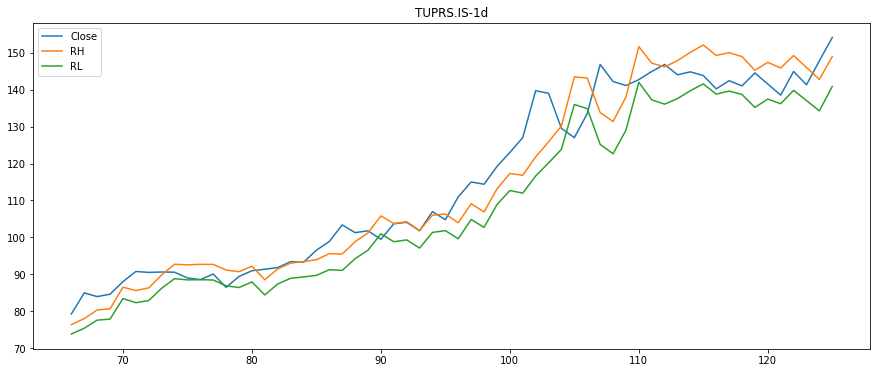

In [46]:
calc(tick,per,inter)

# A


In [35]:
tick = 'TUPRS.IS'
per = '6mo'
inter = '1d'

In [37]:
df=getData(tick,per,inter).reset_index().drop(columns=['Close']).rename(columns={'Adj Close':'Close'})

[*********************100%***********************]  1 of 1 completed


In [39]:
df

,Date,Open,High,Low,Close,Volume
0,2023-03-22 00:00:00+03:00,76.142860,78.642860,75.714287,78.357140,25999036
1,2023-03-23 00:00:00+03:00,78.099998,78.771431,77.185715,78.099998,18509127
2,2023-03-24 00:00:00+03:00,78.099998,78.571426,75.942856,76.257141,20348790
3,2023-03-27 00:00:00+03:00,76.685715,76.928574,74.842857,74.842857,16438562
4,2023-03-28 00:00:00+03:00,75.000000,75.599998,73.199997,73.199997,28563766
...,...,...,...,...,...,...
121,2023-09-18 00:00:00+03:00,141.000000,142.600006,136.300003,138.500000,31212147
122,2023-09-19 00:00:00+03:00,138.500000,145.899994,137.500000,144.899994,44903775
123,2023-09-20 00:00:00+03:00,145.000000,145.500000,139.600006,141.300003,27668323
124,2023-09-21 00:00:00+03:00,140.500000,147.800003,138.699997,147.800003,52219463


In [40]:
df['r_var']=df['Close'].rolling(30).var()

In [41]:
df['Volatility']=np.sqrt(df['r_var'])

In [42]:
df['Range']=np.sqrt(30/365)*df['Volatility']

In [43]:
df['RH']=(df['Close']+df['Range']).shift(3)
df['RL']=(df['Close']-df['Range']).shift(3)

In [44]:
df

,Date,Open,High,Low,Close,Volume,r_var,Volatility,Range,RH,RL
0,2023-03-22 00:00:00+03:00,76.142860,78.642860,75.714287,78.357140,25999036,NaN,NaN,NaN,NaN,NaN
1,2023-03-23 00:00:00+03:00,78.099998,78.771431,77.185715,78.099998,18509127,NaN,NaN,NaN,NaN,NaN
2,2023-03-24 00:00:00+03:00,78.099998,78.571426,75.942856,76.257141,20348790,NaN,NaN,NaN,NaN,NaN
3,2023-03-27 00:00:00+03:00,76.685715,76.928574,74.842857,74.842857,16438562,NaN,NaN,NaN,NaN,NaN
4,2023-03-28 00:00:00+03:00,75.000000,75.599998,73.199997,73.199997,28563766,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
121,2023-09-18 00:00:00+03:00,141.000000,142.600006,136.300003,138.500000,31212147,220.446840,14.847452,4.256632,145.834807,136.165193
122,2023-09-19 00:00:00+03:00,138.500000,145.899994,137.500000,144.899994,44903775,199.193315,14.113586,4.046239,149.209231,139.790769
123,2023-09-20 00:00:00+03:00,145.000000,145.500000,139.600006,141.300003,27668323,166.934990,12.920332,3.704144,145.975604,137.024396
124,2023-09-21 00:00:00+03:00,140.500000,147.800003,138.699997,147.800003,52219463,146.309890,12.095863,3.467776,142.756632,134.243368


In [ ]:
df[['Close','RH','RL']][-60:].plot(figsize=(15,6),title=f'{tick}-{inter}')

In [3]:
df = getData('GARAN.IS','6mo','1h')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-02 09:30:00+03:00,27.480000,28.059999,27.379999,27.860001,27.860001,0
2023-05-02 10:30:00+03:00,27.860001,28.000000,27.680000,27.820000,27.820000,3941174
2023-05-02 11:30:00+03:00,27.820000,28.000000,27.580000,27.920000,27.920000,4807899
2023-05-02 12:30:00+03:00,27.900000,27.920000,27.620001,27.820000,27.820000,2591229
2023-05-02 13:30:00+03:00,27.799999,27.900000,27.719999,27.840000,27.840000,2359451
...,...,...,...,...,...,...
2023-10-27 14:30:00+03:00,47.900002,48.200001,47.720001,47.820000,47.820000,2428304
2023-10-27 15:30:00+03:00,47.820000,48.400002,47.520000,48.099998,48.099998,4290281
2023-10-27 16:30:00+03:00,48.119999,49.119999,47.939999,48.840000,48.840000,9333086
